In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk("data/titanic"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Typical workflow: 
1. data exploration (visualization, understanding the data/problem)
2. cleaning/imputation (e.g. `fillna`, removal of redundant/least important columns etc.). 
3. model selection, training (is this problem classification or regression; selection of the most efficient model)
4. submit prediction

# 1. EDA - Exploratory Data Analysis

## Read datacard of competition

https://www.kaggle.com/competitions/titanic/data

## Read data

In [6]:
train = pd.read_csv("/kaggle/input/titanic/train.csv", index_col="PassengerId")
test = pd.read_csv("/kaggle/input/titanic/test.csv", index_col="PassengerId")
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [7]:
train.describe()  # stats of each column

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.dtypes  # any suggestions/conclusions at this step?

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [9]:
print(train.isnull().sum(), "\n")
print(test.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64 

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


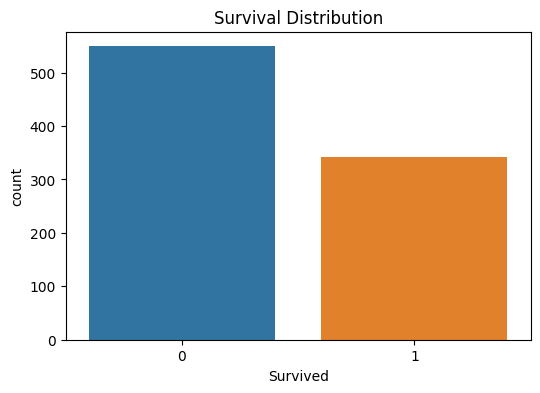

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


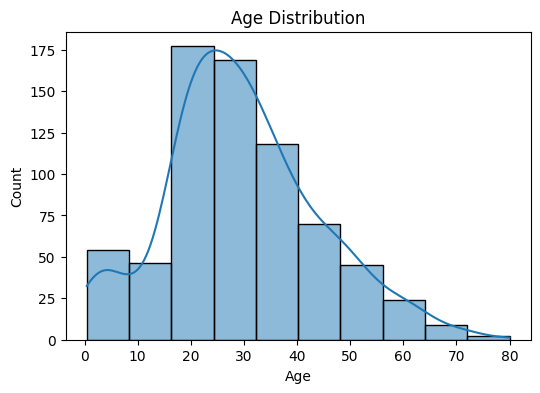

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


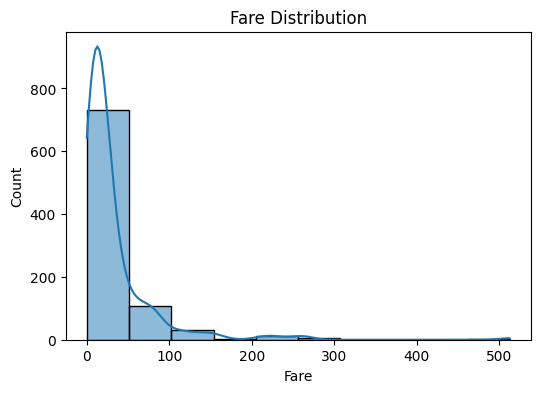

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


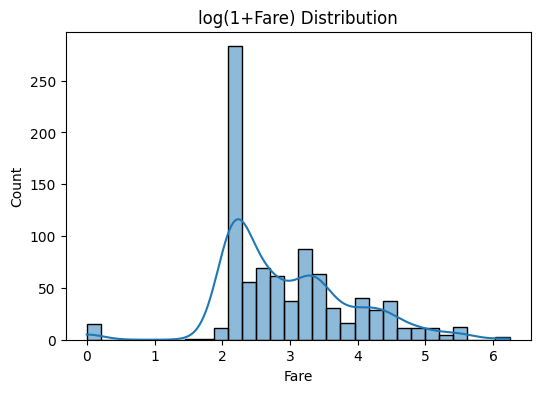

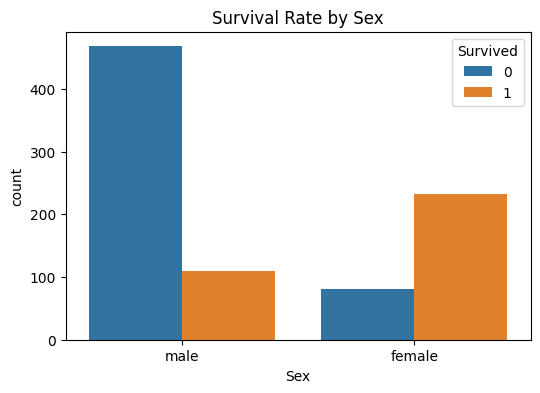

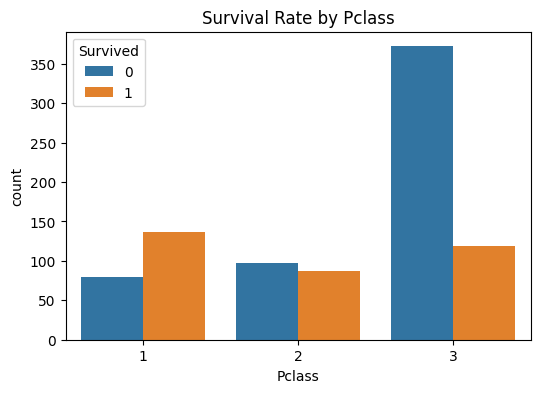

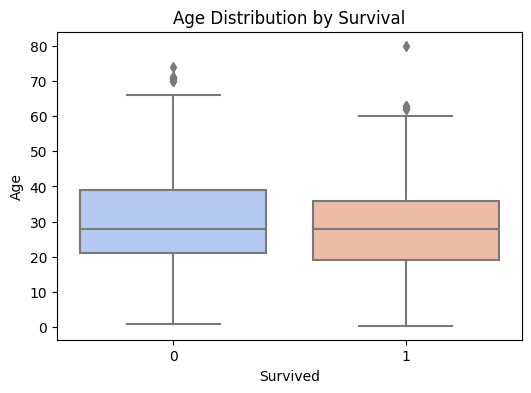

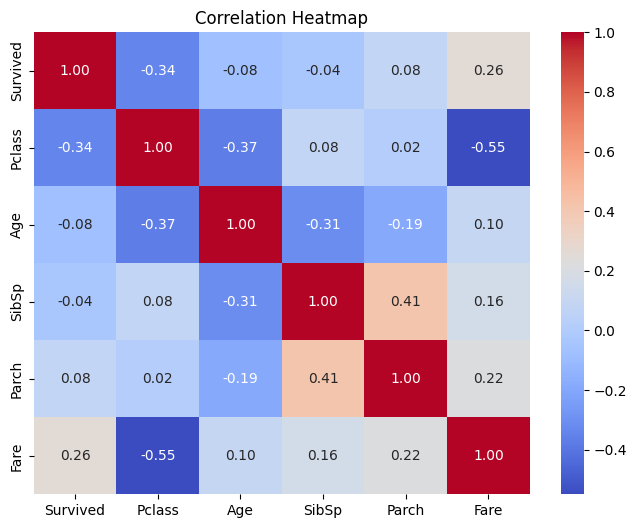

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def eda_titanic_data(df):
    # Distribution of target variable 'Survived'
    plt.figure(figsize=(6, 4))
    sns.countplot(x="Survived", data=df)
    plt.title("Survival Distribution")
    plt.show()

    # Distribution of 'Age'
    plt.figure(figsize=(6, 4))
    sns.histplot(df["Age"], kde=True, bins=10)
    plt.title("Age Distribution")
    plt.show()

    # Distribution of 'Fare'
    plt.figure(figsize=(6, 4))
    sns.histplot(df["Fare"], kde=True, bins=10)
    plt.title("Fare Distribution")
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.histplot(np.log1p(df["Fare"]), kde=True, bins=30)
    plt.title("log(1+Fare) Distribution")
    plt.show()

    # Survival rate by Sex
    plt.figure(figsize=(6, 4))
    sns.countplot(x="Sex", hue="Survived", data=df)
    plt.title("Survival Rate by Sex")
    plt.show()

    # Survival rate by Pclass
    plt.figure(figsize=(6, 4))
    sns.countplot(x="Pclass", hue="Survived", data=df)
    plt.title("Survival Rate by Pclass")
    plt.show()

    # Box Plot for Age vs Survived
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="Survived", y="Age", data=df, palette="coolwarm")
    plt.title("Age Distribution by Survival")
    plt.show()

    # Correlation heatmap of numeric features
    plt.figure(figsize=(8, 6))
    corr = df.select_dtypes(include=[np.number]).corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()


eda_titanic_data(train)

# 2. Preprocessing

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


def preprocess_data(train_df, test_df):
    # Drop the 'Name', 'Cabin', 'Ticket' columns from both train and test datasets
    train_df = train_df.drop(["Name", "Cabin", "Ticket"], axis=1)
    test_df = test_df.drop(["Name", "Cabin", "Ticket"], axis=1)

    # Fill missing Age values with the median
    median = train_df["Age"].median()
    train_df["Age"] = train_df["Age"].fillna(median)
    test_df["Age"] = test_df["Age"].fillna(median)

    # Fill missing Embarked values with the most frequent value (mode)
    mode = train_df["Embarked"].mode()[0]
    train_df["Embarked"] = train_df["Embarked"].fillna(mode)
    test_df["Embarked"] = test_df["Embarked"].fillna(mode)

    # Fill missing Fare values with the median and log
    median = train_df["Fare"].median()
    train_df["Fare"] = np.log1p(train_df["Fare"].fillna(median))
    test_df["Fare"] = np.log1p(test_df["Fare"].fillna(median))

    # Encoding categorical features: 'Sex', 'Embarked'
    label_encoder = LabelEncoder()
    train_df["Sex"] = label_encoder.fit_transform(train_df["Sex"])
    test_df["Sex"] = label_encoder.transform(test_df["Sex"])

    train_df["Embarked"] = label_encoder.fit_transform(train_df["Embarked"])
    test_df["Embarked"] = label_encoder.transform(test_df["Embarked"])

    # Scale numeric features: Age, Fare
    scaler = StandardScaler()
    train_df[["Age", "Fare"]] = scaler.fit_transform(train_df[["Age", "Fare"]])
    test_df[["Age", "Fare"]] = scaler.transform(test_df[["Age", "Fare"]])

    return train_df, test_df


train, test = preprocess_data(train, test)

In [12]:
# Features and labels
from sklearn.model_selection import train_test_split

X = train.drop("Survived", axis=1)
y = train["Survived"]
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [13]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,-0.565736,1,0,-0.879741,2
2,1,0,0.663861,1,0,1.361220,0
3,3,0,-0.258337,0,0,-0.798540,2
4,1,0,0.433312,1,0,1.062038,2
5,3,1,0.433312,0,0,-0.784179,2
...,...,...,...,...,...,...,...
887,2,1,-0.181487,0,0,-0.333698,2
888,1,0,-0.796286,0,0,0.487082,2
889,3,0,-0.104637,1,2,0.242007,2


In [14]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

# 3. Model selection & training

Logistic Regression Accuracy:  0.8134328358208955
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



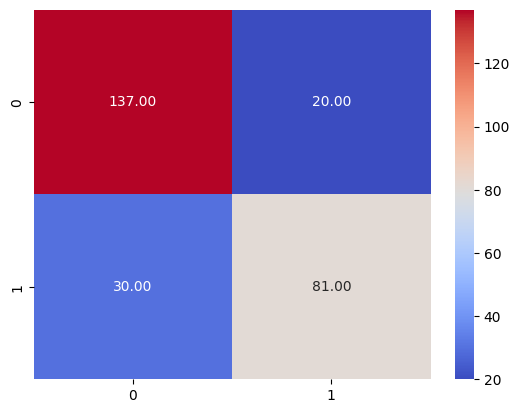

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

# Logistic Regression model
logreg = LogisticRegression(max_iter=200)

# Train the model
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_valid)

# Evaluate the model
print("Logistic Regression Accuracy: ", accuracy_score(y_valid, y_pred))
sns.heatmap(confusion_matrix(y_valid, y_pred), annot=True, cmap="coolwarm", fmt=".2f")
print("Classification Report:\n", classification_report(y_valid, y_pred))

Random Forest Accuracy:  0.7798507462686567
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       157
           1       0.75      0.69      0.72       111

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



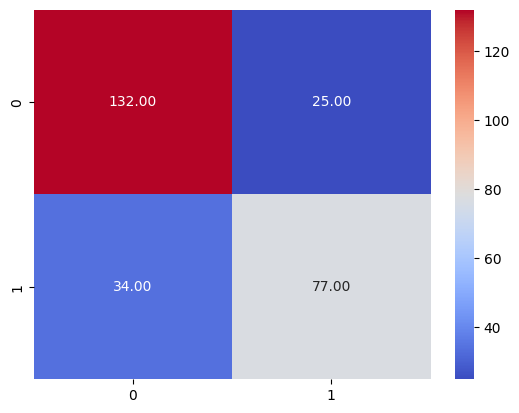

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_valid)

# Evaluate the model
print("Random Forest Accuracy: ", accuracy_score(y_valid, y_pred))
sns.heatmap(confusion_matrix(y_valid, y_pred), annot=True, cmap="coolwarm", fmt=".2f")
print("Classification Report:\n", classification_report(y_valid, y_pred))

# 4. Submit prediction

In [22]:
# Make prediction for test data
test_preds = logreg.predict(test)

# Save prediction in required format
pd.DataFrame({"PassengerId": test.index, "Survived": test_preds}).to_csv(
    "./submission.csv", index=False
)

In [21]:
pd.read_csv("./submission.csv")

AttributeError: module 'pandas' has no attribute 'to_csv'